# K Nearest Neghbors

## Plan

1. Algorithm Discussion
2. Demo KNN in a single dimension
3. Demo in 2 dimensions
4. How to choose `k` ? Visualize model performance

## K Nearest Neighbors Classifier

Makes predictions based off of the closest observations.

### Pros

- Fast to train
- Intuitive
- can pick up on arbitrary patterns (unline logit or dtrees)
- one assumption: closer points are more similar

### Cons

- `k` is unknown
- Model parameter is the entire training dataset
- Prediction can be expensive (lazy)
- Because distance is used, scaling can be important
- No feature weights

### Hyperparams

- **k**: `n_neighbors`: closest k datapoints to consider
- weights
    - uniform: each k closest point's vote has equal weight
    - distance: votes are weighted by distance to the new observation
- distance metric

`n_neighbors` is the hyperparameter we'll most commonly interact with.

## Review

What's a hyperparameter?

- A value we choose ahead of time that is **not** learned from the data
- `C` in LogisticRegression
- `max_depth` in a DecisionTree
- `n_estimators` in a RandomForestClassifier
- `n_neighbors` in k nearest neighbors

What's a parameter?

- values "learned" from the training data
- the information we need to make predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import knn_lesson_util as util

from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rc('axes', grid=True)
plt.rc('figure', figsize=(11, 8.5))
plt.rc('axes.spines', top=False, right=False)

For the sake of simplicity in the lesson, we're just going to look at train and test.

In a real project, what I refer to as test here would be your validate split.

In [3]:
train, test = util.get_ice_cream_data(True)

In [5]:
train.shape, test.shape

((90, 3), (10, 3))

In [4]:
train.head(10)

,flavor,pints,n_sprinkles
1,blueberry,7.675963,9.218088
88,blueberry,7.129386,11.863298
58,pistachio,12.182332,4.433103
30,pistachio,13.955832,8.325024
61,chocolate,10.748216,8.920000
18,pistachio,11.748810,7.910239
81,pistachio,12.643337,14.461707
75,pistachio,13.541231,11.137933
13,blueberry,7.690777,12.123159
37,pistachio,13.819761,10.373848


## Single Dimension Example

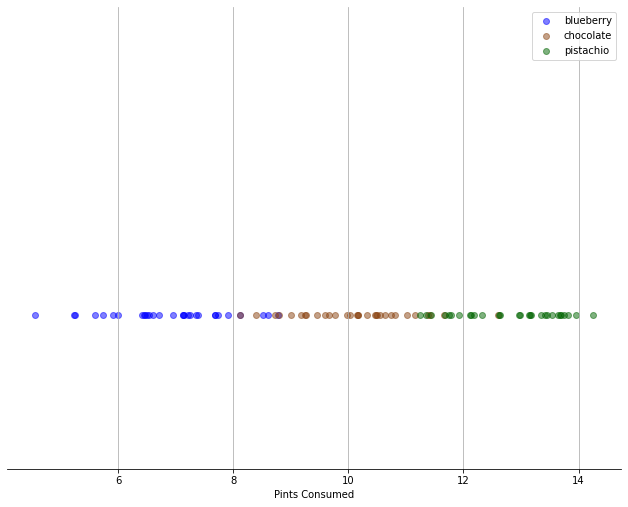

In [6]:
util.plot_pints(train, test, plot_test=False)

## 2d Example

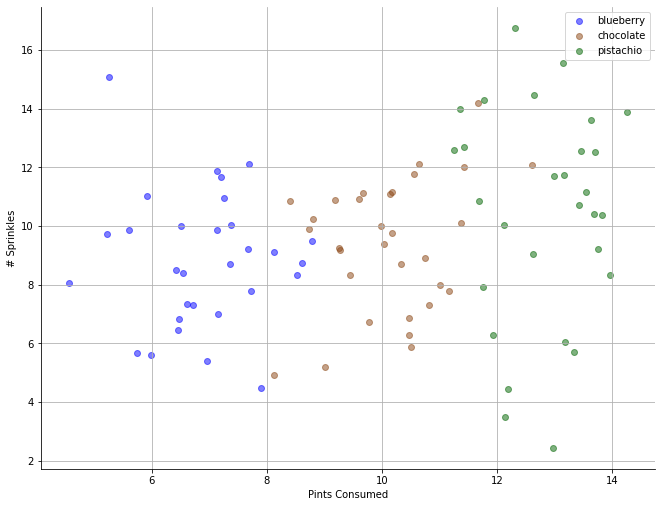

In [7]:
util.plot_pints_and_sprinkles(train, test, plot_test=False)

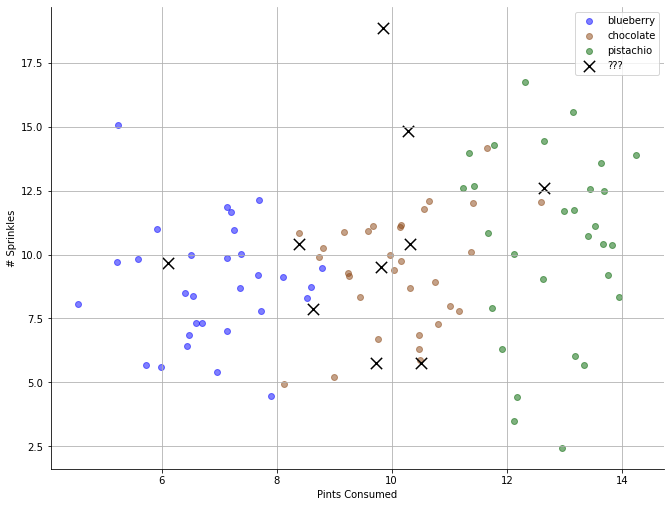

In [8]:
util.plot_pints_and_sprinkles(train, test, plot_test=True)

How do we calculate distance? Euclidean distance

$$ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

## Modeling

In [9]:
X_train = train[['pints', 'n_sprinkles']]
X_test = test[['pints', 'n_sprinkles']]
y_train = train.flavor
y_test = test.flavor

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [11]:
knn.score(X_test, y_test)

0.7

In [ ]:
test['prediction'] = 

### How do we choose a value for `k`?

- **Measure**
- Create models with different values of k and compare the selection of k with that model's accuracy (or performance metric of your choice) (on unseen data!).

In [12]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 70.00%
 2: 80.00%
 3: 80.00%
 4: 80.00%
 5: 80.00%
 6: 80.00%
 7: 80.00%
 8: 80.00%
 9: 80.00%
10: 70.00%
11: 70.00%
12: 70.00%


### Visualize Model

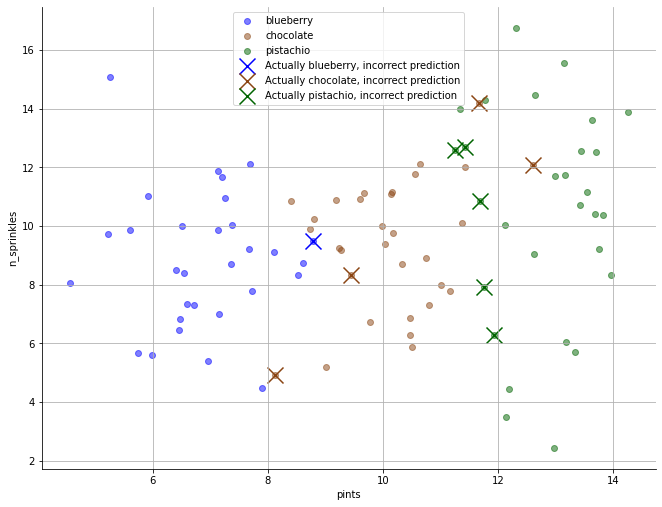

In [13]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

train['prediction'] = knn.predict(X_train)
train['correct'] = train.prediction == train.flavor

util.plot_misses(train)